# Reconstruction of Spatial P Image

In [1]:
%cd H:\GitHub\pytracer\

H:\GitHub\pytracer


In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
import numpy as np
from scripts.assemblies import shielded_assembly
from scripts.utils import nice_double_plot
import pytracer.geometry as geo
import pytracer.fission as fission
import pytracer.neutron_chain as nchain
import pytracer.neutron_chain_c as nchain_c

In [3]:
assembly_solids = shielded_assembly()
assembly_flat = geo.flatten(assembly_solids)

# Variation of fission probability p (Truth)

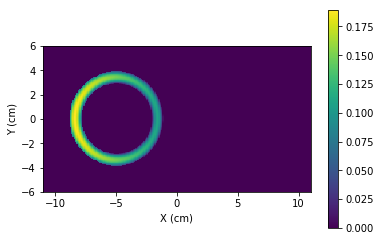

In [4]:
xs = np.linspace(-11, 11, 200)
ys = np.linspace(-6, 6, 200)
zs, extent = nchain.p_image(xs, ys, assembly_flat)

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
im = ax.imshow(zs, interpolation='none', extent=extent)
plt.colorbar(im)
ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.set_aspect('equal')
plt.show()

# Neutron Responses

In [5]:
n_rotation, n_beam = 100, 100

radians = np.linspace(0, np.pi, n_rotation)
arc_radians = np.linspace(-np.pi / 8, np.pi / 8, n_beam)
source, detector_points, extent = geo.fan_beam_paths(60, arc_radians, radians, extent=True)
source = source[0, :, :]

grid = geo.Grid(width=25, height=15, num_x=25, num_y=15)

with np.load(r'scripts\data\nudist_matrix_pu239.npz') as data:
    p_range = data['p_range']
    matrix = data['matrix']

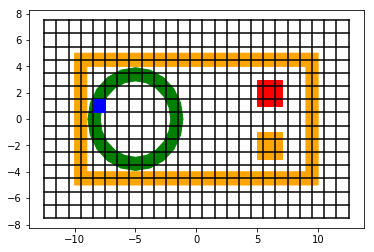

In [12]:
geo.draw(assembly_solids)
grid.draw()
cell_i = 154
grid_points = grid.cell(cell_i)
plt.fill(grid_points[:, 0], grid_points[:, 1], color='blue', zorder=12)

# Cell Response - Single Neutron

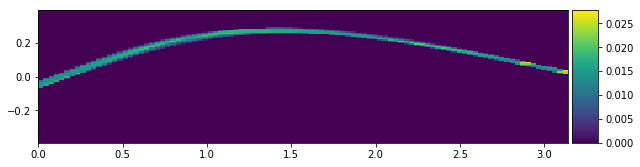

In [19]:
unit_m = geo.Material('black', 1, 1, 0)
vacuum = geo.Material('white', 0, 0, 0)
cell_geom = [geo.Solid(geo.convert_points_to_segments(grid.cell(cell_i), circular=True), unit_m, vacuum)]
cell_flat = geo.flatten(cell_geom)
cell_response = fission.grid_response_scan(source, detector_points, detector_points, cell_flat, 
                                           assembly_flat, 1, matrix, p_range, 0.18)

plt.figure(figsize=(9, 6))
ax = plt.gca()
im = ax.imshow(cell_response.T, interpolation='none', extent=extent, cmap='viridis')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(im, cax=cax)
plt.tight_layout()
plt.show()

# Cell Response - Double Neutron

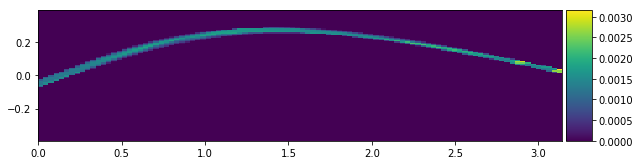

In [20]:
unit_m = geo.Material('black', 1, 1, 0)
vacuum = geo.Material('white', 0, 0, 0)
cell_geom = [geo.Solid(geo.convert_points_to_segments(grid.cell(cell_i), circular=True), unit_m, vacuum)]
cell_flat = geo.flatten(cell_geom)
cell_response = fission.grid_response_scan(source, detector_points, detector_points, cell_flat, 
                                           assembly_flat, 2, matrix, p_range, 0.18)

plt.figure(figsize=(9, 6))
ax = plt.gca()
im = ax.imshow(cell_response.T, interpolation='none', extent=extent, cmap='viridis')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(im, cax=cax)
plt.tight_layout()
plt.show()

# Grid Response - Single Neutron

In [ ]:
response_single = fission.grid_response(source, detector_points, detector_points, grid, assembly_flat, 1, matrix, p_range)
np.save(r'scripts\data\fission_response_single_vary_p', response_single)

In [21]:
response_single = np.load(r'scripts\data\fission_response_single_vary_p.npy')

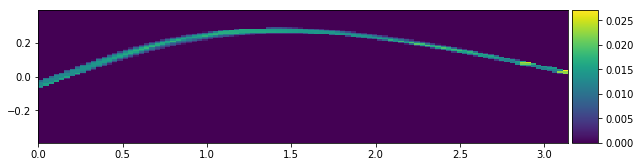

In [22]:
plt.figure(figsize=(9, 6))
ax = plt.gca()
im = ax.imshow(response_single[cell_i].T, interpolation='none', extent=extent, cmap='viridis')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(im, cax=cax)
plt.tight_layout()
plt.show()

# Grid Response - Double Neutron

In [ ]:
response_double = fission.grid_response(source, detector_points, detector_points, grid, assembly_flat, 2, matrix, p_range)
np.save(r'scripts\data\fission_response_double_vary_p', response_double)

In [23]:
response_double = np.load(r'scripts\data\fission_response_double_vary_p.npy')

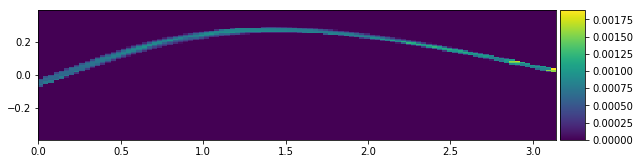

In [24]:
plt.figure(figsize=(9, 6))
ax = plt.gca()
im = ax.imshow(response_double[cell_i].T, interpolation='none', extent=extent, cmap='viridis')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(im, cax=cax)
plt.tight_layout()
plt.show()

# Measurements

# Single Neutron

In [12]:
single_probs = fission.scan(source, detector_points, detector_points, assembly_flat, 1, matrix, p_range)
np.save(r'scripts\data\single_probs_vary_p', single_probs)

10000


In [ ]:
single_probs = np.load(r'scripts\data\single_probs_vary_p.npy')

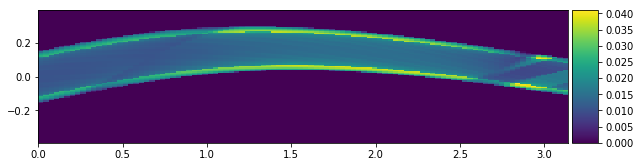

In [13]:
plt.figure(figsize=(9, 6))
ax = plt.gca()
im = ax.imshow(single_probs.T, interpolation='none', extent=extent, cmap='viridis')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(im, cax=cax)
plt.tight_layout()
plt.show()

# Double Neutron

In [14]:
double_probs = fission.scan(source, detector_points, detector_points, assembly_flat, 2, matrix, p_range)
np.save(r'scripts\data\double_probs_vary_p', double_probs)

10000


In [ ]:
double_probs = np.load(r'scripts\data\double_probs_vary_p.npy')

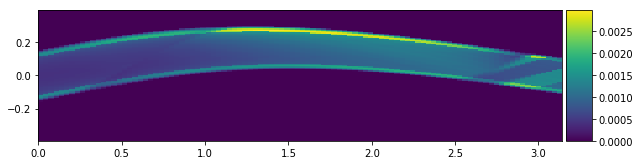

In [15]:
plt.figure(figsize=(9, 6))
ax = plt.gca()
im = ax.imshow(double_probs.T, interpolation='none', extent=extent, cmap='viridis')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(im, cax=cax)
plt.tight_layout()
plt.show()